In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import kagglehub

In [9]:
data_url="https://stats.idre.ucla.edu/stat/data/binary.dta"
data=pd.read_stata(data_url)
data.head()

,admit,gre,gpa,rank
0,0.0,380.0,3.61,3.0
1,1.0,660.0,3.67,3.0
2,1.0,800.0,4.00,1.0
3,1.0,640.0,3.19,4.0
4,0.0,520.0,2.93,4.0


In [10]:
data.dtypes

,0
admit,float32
gre,float32
gpa,float32
rank,float32


In [12]:
data.isnull().sum()

,0
admit,0
gre,0
gpa,0
rank,0


In [14]:
x=data[['gre','gpa','rank']]
y=data['admit']

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)
display(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(320, 3)

(320,)

(80, 3)

(80,)

In [16]:
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [17]:
conf_mat=metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix : ', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100),'%')

Confusion Matrix :  [[50  2]
 [23  5]]
Accuracy Score :  0.6875
Accuracy in Percentage :  68 %


<Axes: >

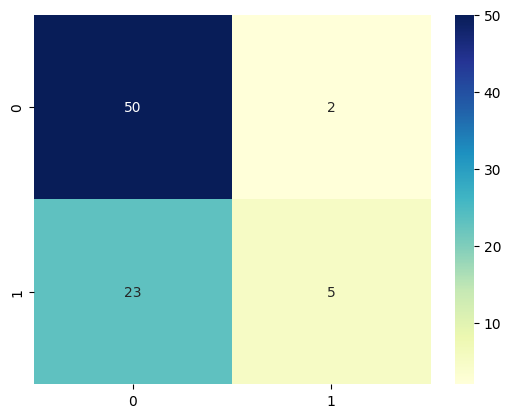

In [19]:
sn.heatmap(conf_mat, annot=True, cmap='YlGnBu')